# Lab: Binary classification with decision trees

**Author**: J. Hickman

The breast cancer dataset is a well studied binary classification dataset.

* Classes: 2
* Samples per class: 212(M),357(B)
* Samples total:569
* Dimensionality: 30
* Features: real, positive

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is downloaded from: https://goo.gl/U2Uwz2

In this lab we will use the dataset to train a decision tree model. 

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

**Instructions** 
* Read and work through all tutorial content and do all exercises below
  
**Submission:**
* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

**For reference recall the following definitions**
* Accuracy classification score. In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
  
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
  * The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
  * The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html


---
format:
    html:
        embed-resources: true
---

#### 4.1.0 Student information 

Please provide the following information 

In [ ]:
# ## Name: [Herry Wei]
# ## Date: [11/19/2024]
# ## Class Section: [Section 2]
# ## Lab Section: [Lab 5.3]

#### Import

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#### 4.1.1: Import 

The following code will import the data file into a pandas data-frame

In [2]:
# LOAD THE DATAFRAME
from sklearn.datasets import load_breast_cancer
(x,y) = load_breast_cancer(return_X_y=True,as_frame=True)
df=pd.concat([x,y],axis=1)

# LOOK AT FIRST ROW
print(df.iloc[0])

mean radius                  17.990000
mean texture                 10.380000
mean perimeter              122.800000
mean area                  1001.000000
mean smoothness               0.118400
mean compactness              0.277600
mean concavity                0.300100
mean concave points           0.147100
mean symmetry                 0.241900
mean fractal dimension        0.078710
radius error                  1.095000
texture error                 0.905300
perimeter error               8.589000
area error                  153.400000
smoothness error              0.006399
compactness error             0.049040
concavity error               0.053730
concave points error          0.015870
symmetry error                0.030030
fractal dimension error       0.006193
worst radius                 25.380000
worst texture                17.330000
worst perimeter             184.600000
worst area                 2019.000000
worst smoothness              0.162200
worst compactness        

In [3]:
# INSERT CODE TO PRINT ITS SHAPE AND COLUMN NAMES

print(df.shape)

print(df.columns)

(569, 31)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


#### 4.1.2: Basic data exploration

We will be using y="target" (output target) and all other remaining columns as our X (input feature) matrix. 

Before doing analysis it is always good to "get inside" the data and see what we are working with

In [ ]:
#INSERT CODE TO PRINT THE FOLLOWING DATA-FRAME WHICH SUMMARIZES EACH COLUMN 

# The describe() function provides statistics
summary = df.describe().transpose()

# Add a column to include the data type of each column
summary['dtypes'] = df.dtypes

# Print summary statistics: data type, minimum, mean, and maximum for each column
print(summary[['dtypes', 'min', 'mean', 'max']])

                          dtypes         min        mean         max
mean radius              float64    6.981000   14.127292    28.11000
mean texture             float64    9.710000   19.289649    39.28000
mean perimeter           float64   43.790000   91.969033   188.50000
mean area                float64  143.500000  654.889104  2501.00000
mean smoothness          float64    0.052630    0.096360     0.16340
mean compactness         float64    0.019380    0.104341     0.34540
mean concavity           float64    0.000000    0.088799     0.42680
mean concave points      float64    0.000000    0.048919     0.20120
mean symmetry            float64    0.106000    0.181162     0.30400
mean fractal dimension   float64    0.049960    0.062798     0.09744
radius error             float64    0.111500    0.405172     2.87300
texture error            float64    0.360200    1.216853     4.88500
perimeter error          float64    0.757000    2.866059    21.98000
area error               float64  

In [8]:
# INSERT CODE TO EXPLORE THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH TARGET (THEN PRINT THE RESULT)

# The value_counts() function counts the occurrences of each unique value in the 'target' column
target_counts = df['target'].value_counts()

# Calculate the proportion of each class
# Divide the counts by the total number of samples to get the percentage
target_proportions = target_counts / len(df)

# Print the results for each target class
# This displays both the count and the proportion of samples in each class
for target, count in target_counts.items():
    proportion = target_proportions[target]
    print(f"Number of points with target={target}: {count} ({proportion:.6f})")

Number of points with target=1: 357 (0.627417)
Number of points with target=0: 212 (0.372583)


(31, 31)


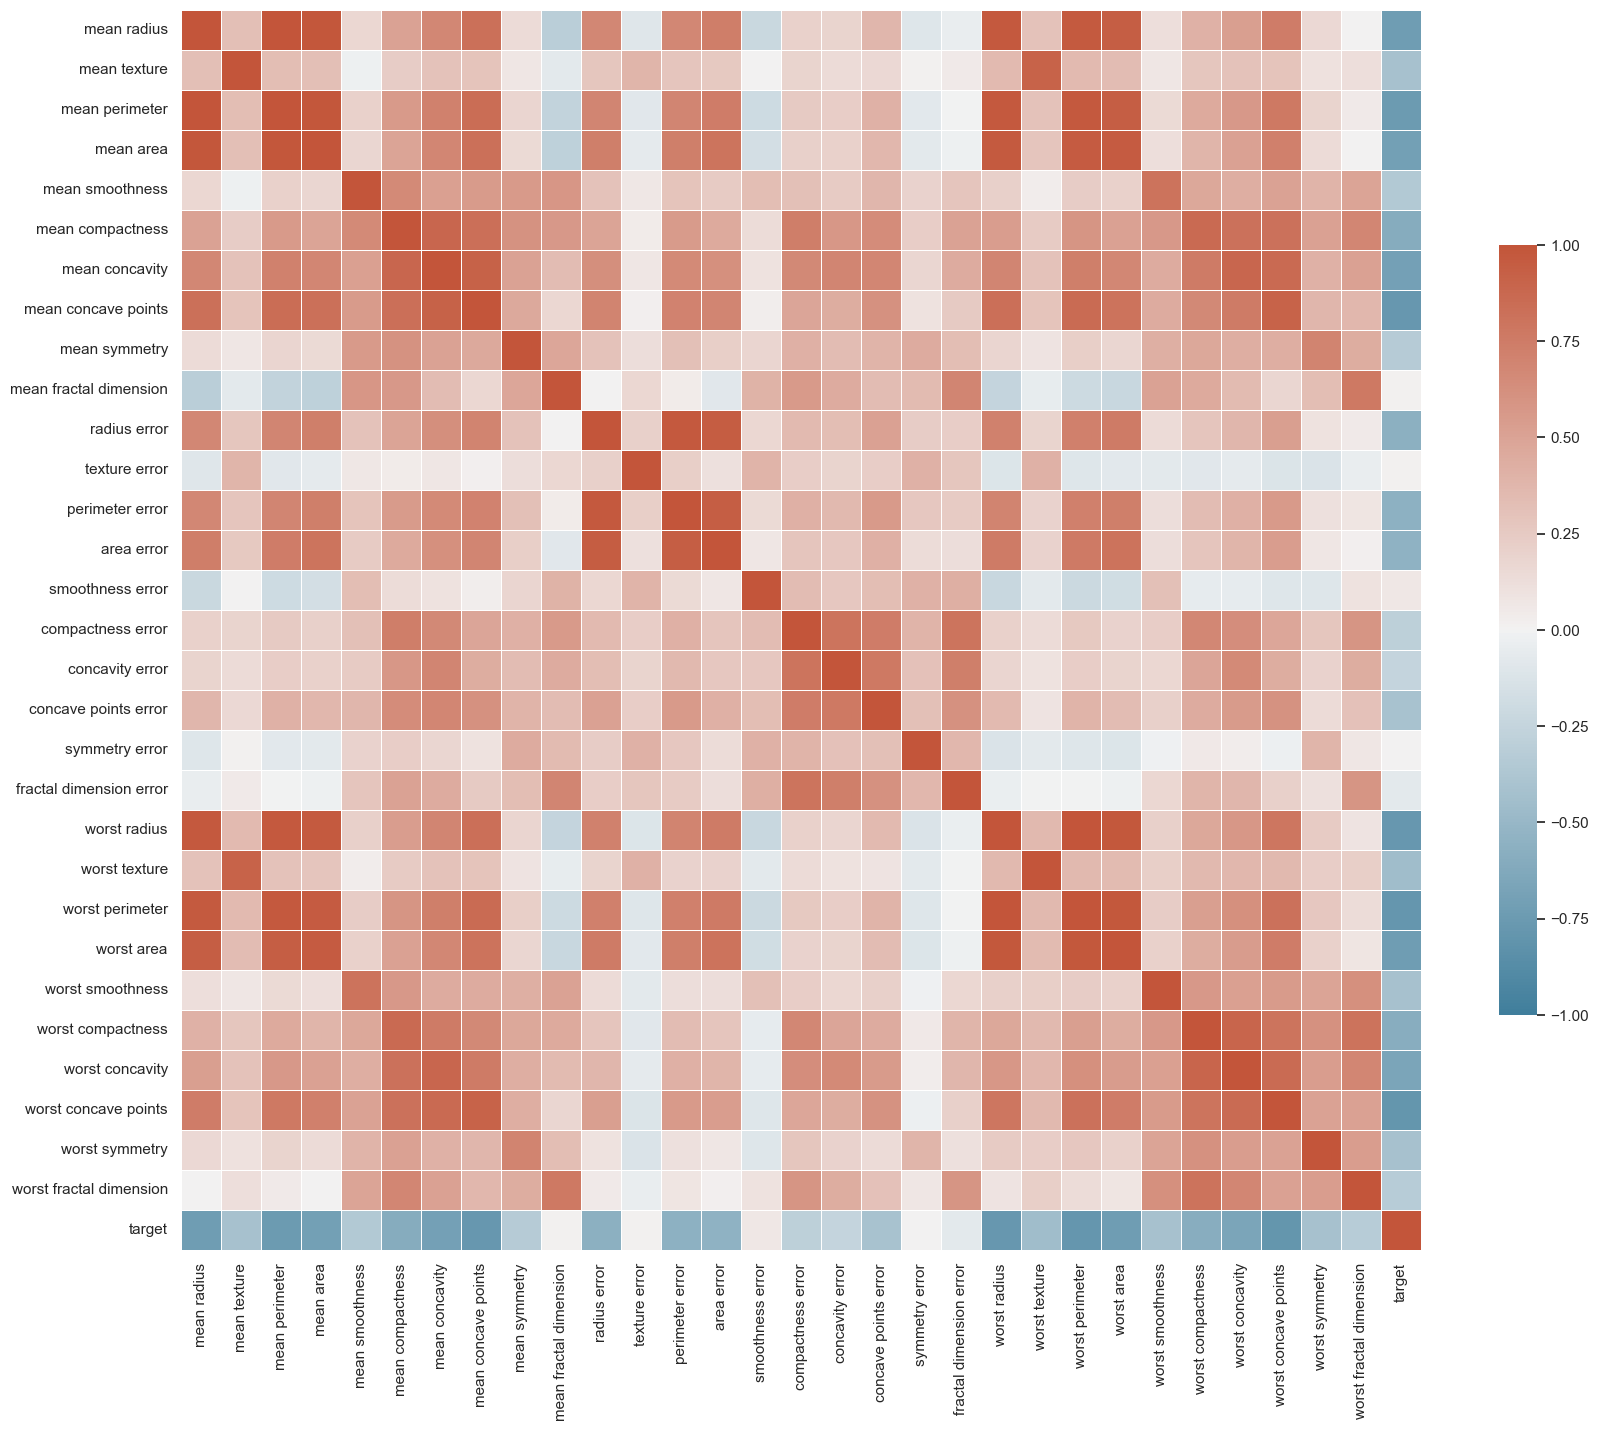

In [9]:
# RUN THE FOLLOWING CODE TO SHOW THE HEAT-MAP FOR THE CORRELATION MATRIX
corr = df.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

When the dataset is very large then the seaborn pairplot is often very slow. 

However, in this case it can still be useful to look at a subset of the features

(569, 11)


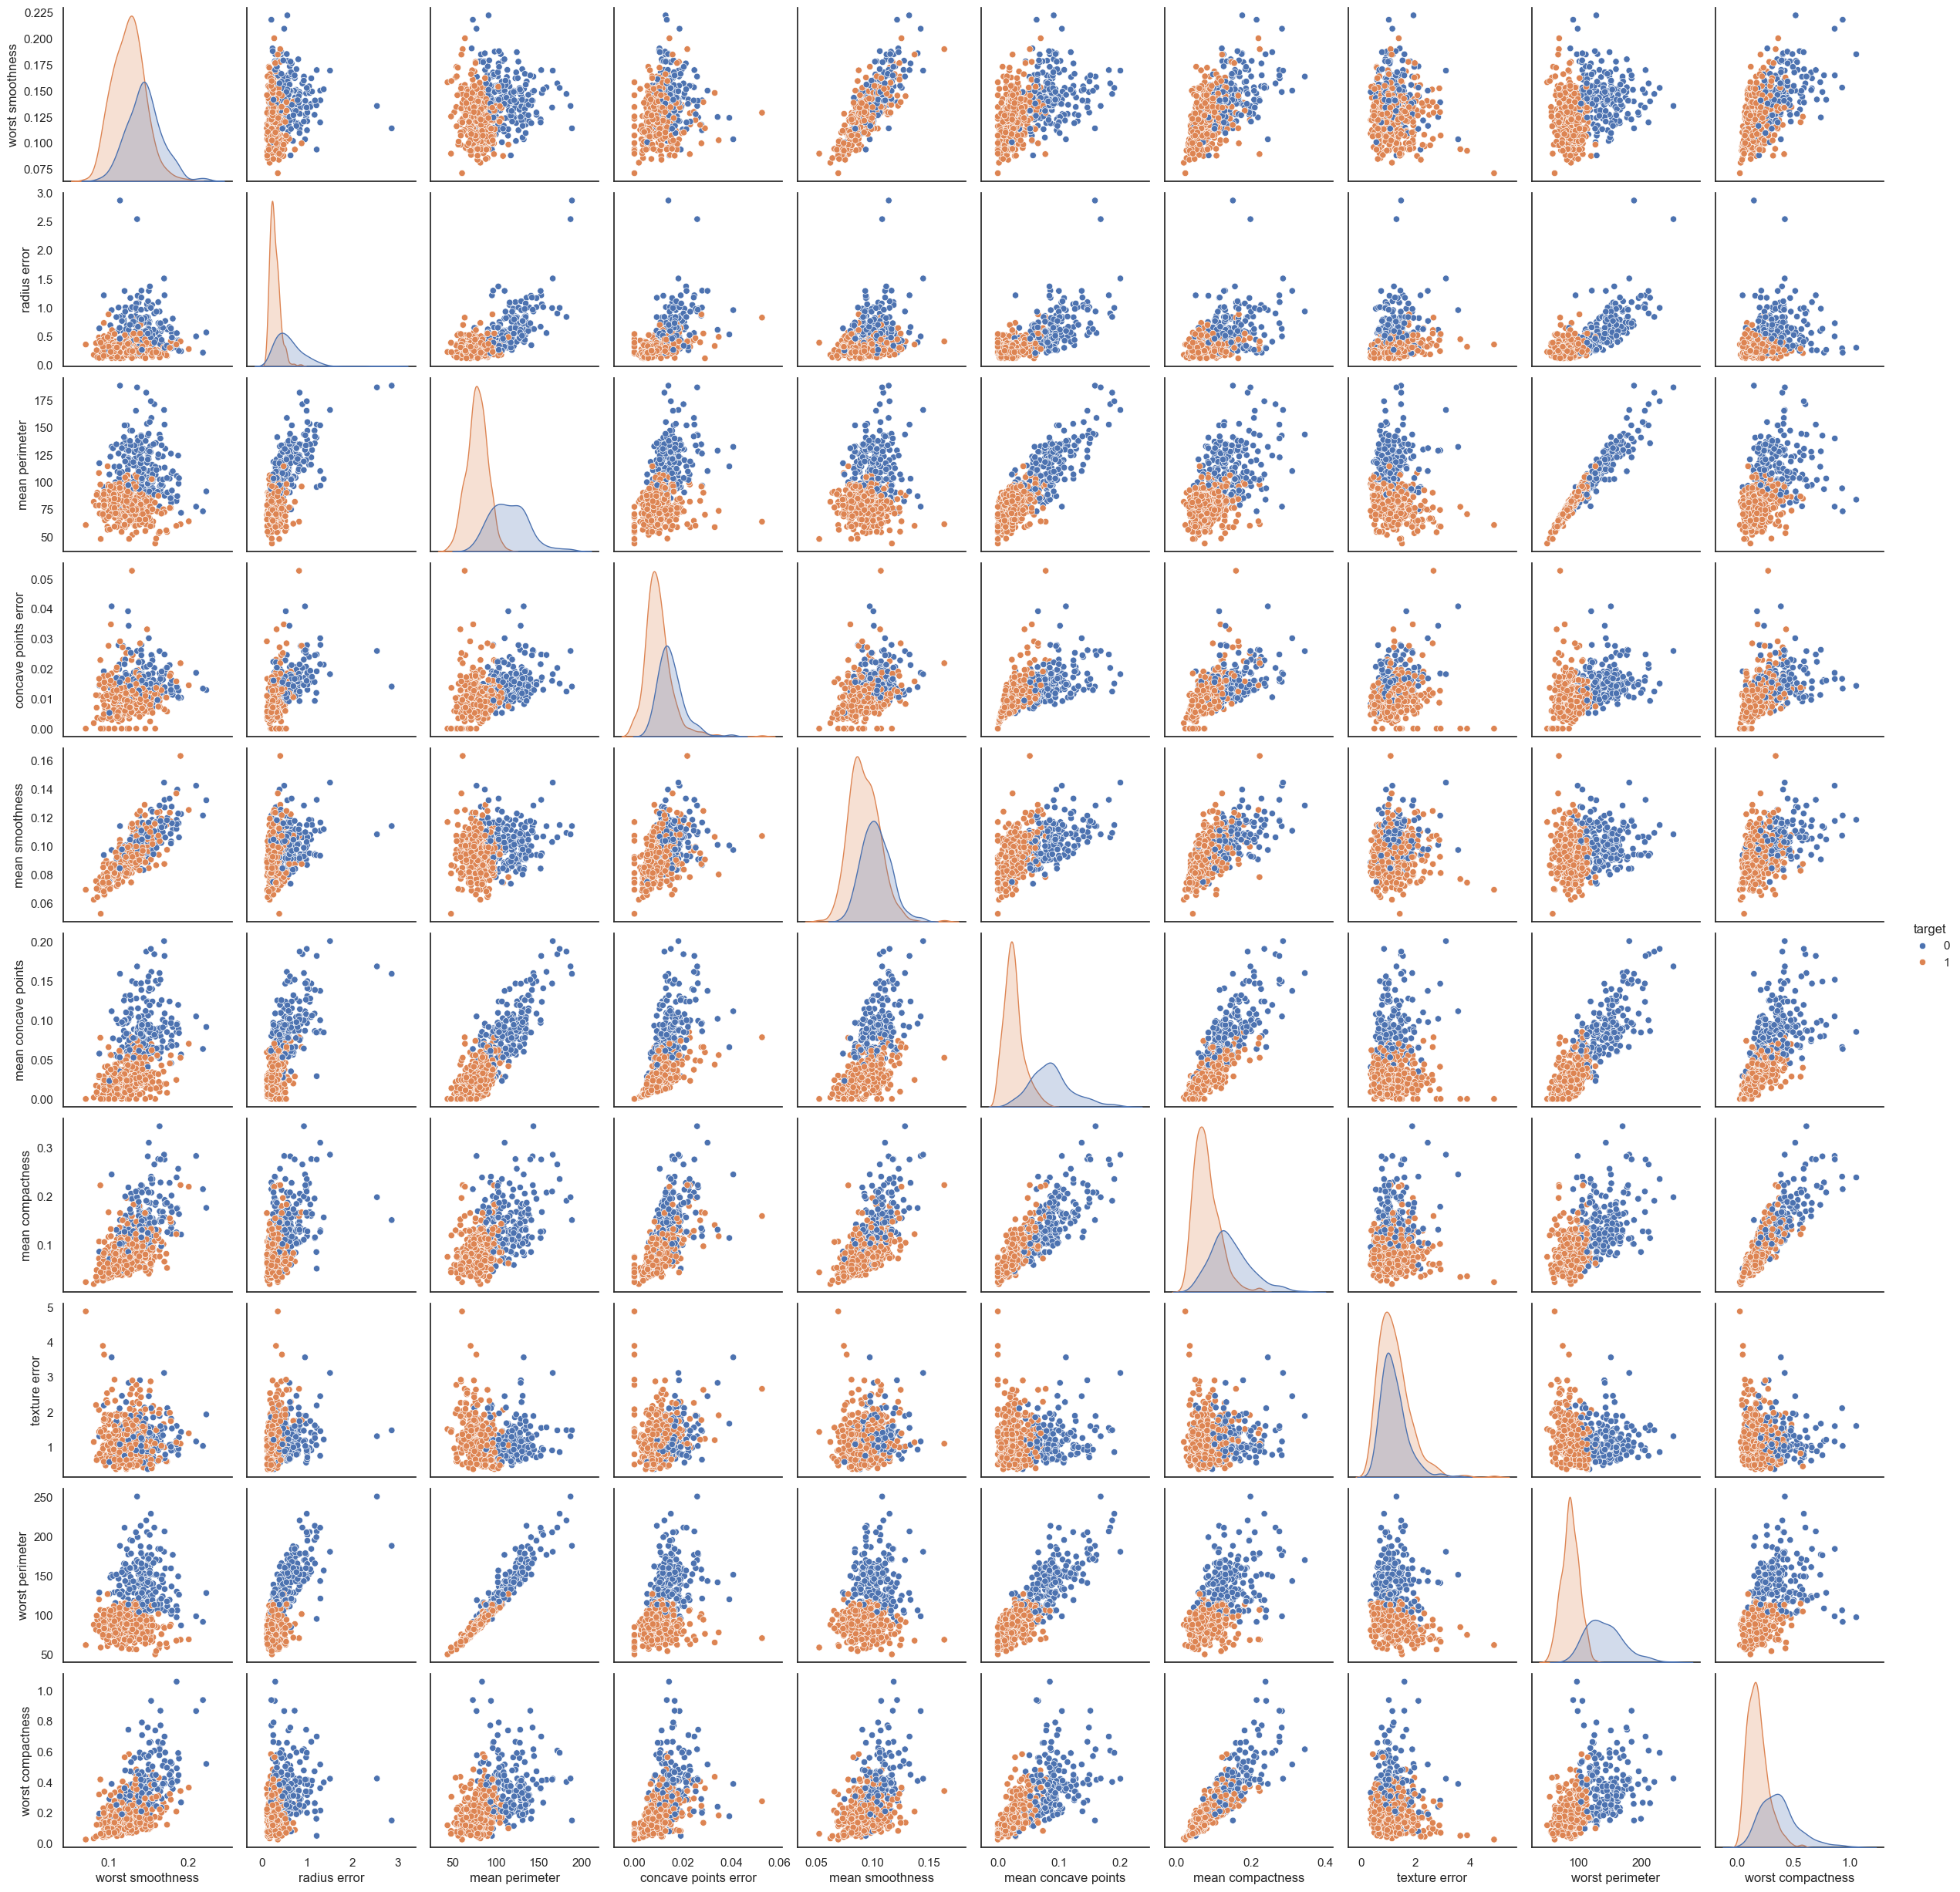

In [10]:
# # RUN THE FOLLOWING CODE TO GENERATE A SEABORN PAIRPLOT 
tmp=pd.concat([df.sample(n=10,axis=1),y],axis=1)
print(tmp.shape)
sns.pairplot(tmp,hue="target", diag_kind='kde')
plt.show()

 #### 4.1.3  Isolate inputs/output & Split data

In [12]:
# INSERT CODE TO MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="target" COLUMN and X="everything else"

X = df.drop(columns='target')  # Remove the 'target' column to get the feature set
Y = df['target']  # Isolate the target column

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# 80% of the data will be used for training, and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
Y_train shape: (455,)
Y_test shape: (114,)


In [13]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS

# Check the distribution of target variable
print("Training target distribution:")
print(Y_train.value_counts(normalize=True))
print("Testing target distribution:")
print(Y_test.value_counts(normalize=True))


Training target distribution:
target
1    0.628571
0    0.371429
Name: proportion, dtype: float64
Testing target distribution:
target
1    0.622807
0    0.377193
Name: proportion, dtype: float64


In [15]:
# INSERT CODE, AS A CONSISTENCY CHECK, TO PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test

# Check the type of X_train
print(type(X_train))
print(X_train.shape)  

# Check the type of Y_train
print(type(Y_train))
print(Y_train.shape) 

# Check the type of X_test
print(type(X_test))  
print(X_test.shape) 

# Check the type of Y_test
print(type(Y_test)) 
print(Y_test.shape)  

<class 'pandas.core.frame.DataFrame'>
(455, 30)
<class 'pandas.core.series.Series'>
(455,)
<class 'pandas.core.frame.DataFrame'>
(114, 30)
<class 'pandas.core.series.Series'>
(114,)


 #### 4.1.4  Training the model

In [16]:
#### INSERT CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)

 #### 4.1.5  Check the results 

Evaluate the performance of the decision tree model by using the test data. 

In [19]:
# INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)


Use the following reference to display the confusion matrix.
 [SKlearn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) will give you the code you need. 

 In the function below, also print the following as part of the function output
 ```
ACCURACY: 0.9035087719298246
NEGATIVE RECALL (Y=0): 0.9574468085106383
NEGATIVE PRECISION (Y=0): 0.8333333333333334
POSITIVE RECALL (Y=1): 0.8656716417910447
POSITIVE PRECISION (Y=1): 0.9666666666666667
[[45  2]
 [ 9 58]]
 ```

In [30]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the decision tree model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Generate predictions
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)

# Define the confusion_plot function
def confusion_plot(y_data, y_pred):
    """
    Generates a confusion matrix plot and prints key metrics:
    Accuracy, Recall, Precision for each class.
    """
    cm = confusion_matrix(y_data, y_pred)
    accuracy = accuracy_score(y_data, y_pred)
    negative_recall = recall_score(y_data, y_pred, pos_label=0)
    positive_recall = recall_score(y_data, y_pred, pos_label=1)
    negative_precision = precision_score(y_data, y_pred, pos_label=0)
    positive_precision = precision_score(y_data, y_pred, pos_label=1)
    
    print(f"ACCURACY: {accuracy}")
    print(f"NEGATIVE RECALL (Y=0): {negative_recall}")
    print(f"NEGATIVE PRECISION (Y=0): {negative_precision}")
    print(f"POSITIVE RECALL (Y=1): {positive_recall}")
    print(f"POSITIVE PRECISION (Y=1): {positive_precision}")
    print("Confusion Matrix:")
    print(cm)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(set(y_data)))
    plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
    plt.yticks(tick_marks, ['Class 0', 'Class 1'])
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()


------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
Confusion Matrix:
[[169   0]
 [  0 286]]


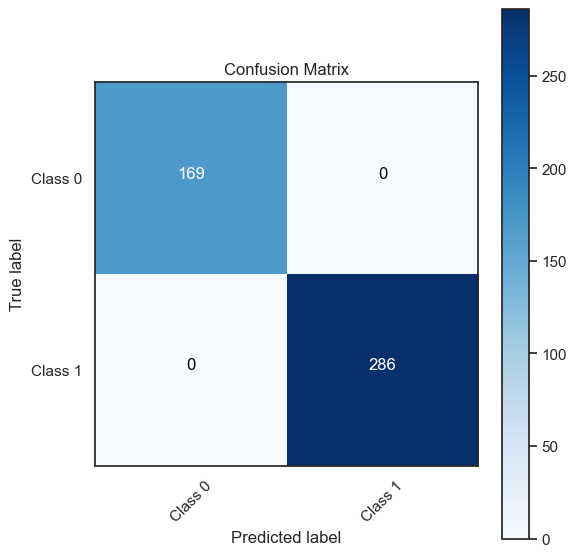

------TEST------
ACCURACY: 0.9298245614035088
NEGATIVE RECALL (Y=0): 0.9069767441860465
NEGATIVE PRECISION (Y=0): 0.9069767441860465
POSITIVE RECALL (Y=1): 0.9436619718309859
POSITIVE PRECISION (Y=1): 0.9436619718309859
Confusion Matrix:
[[39  4]
 [ 4 67]]


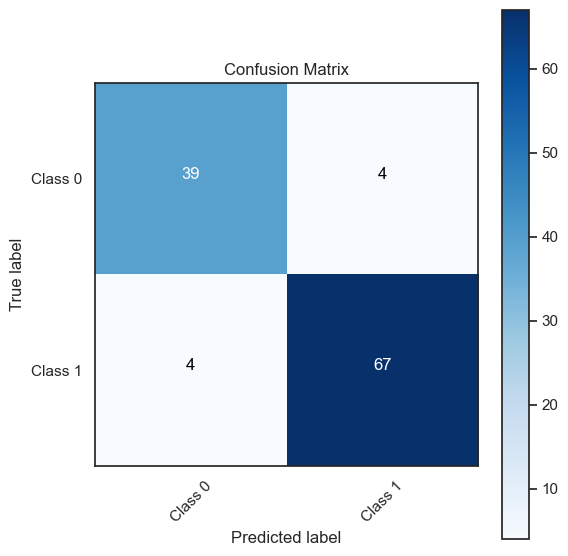

In [31]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)


 #### 4.1.6  Visualize the tree

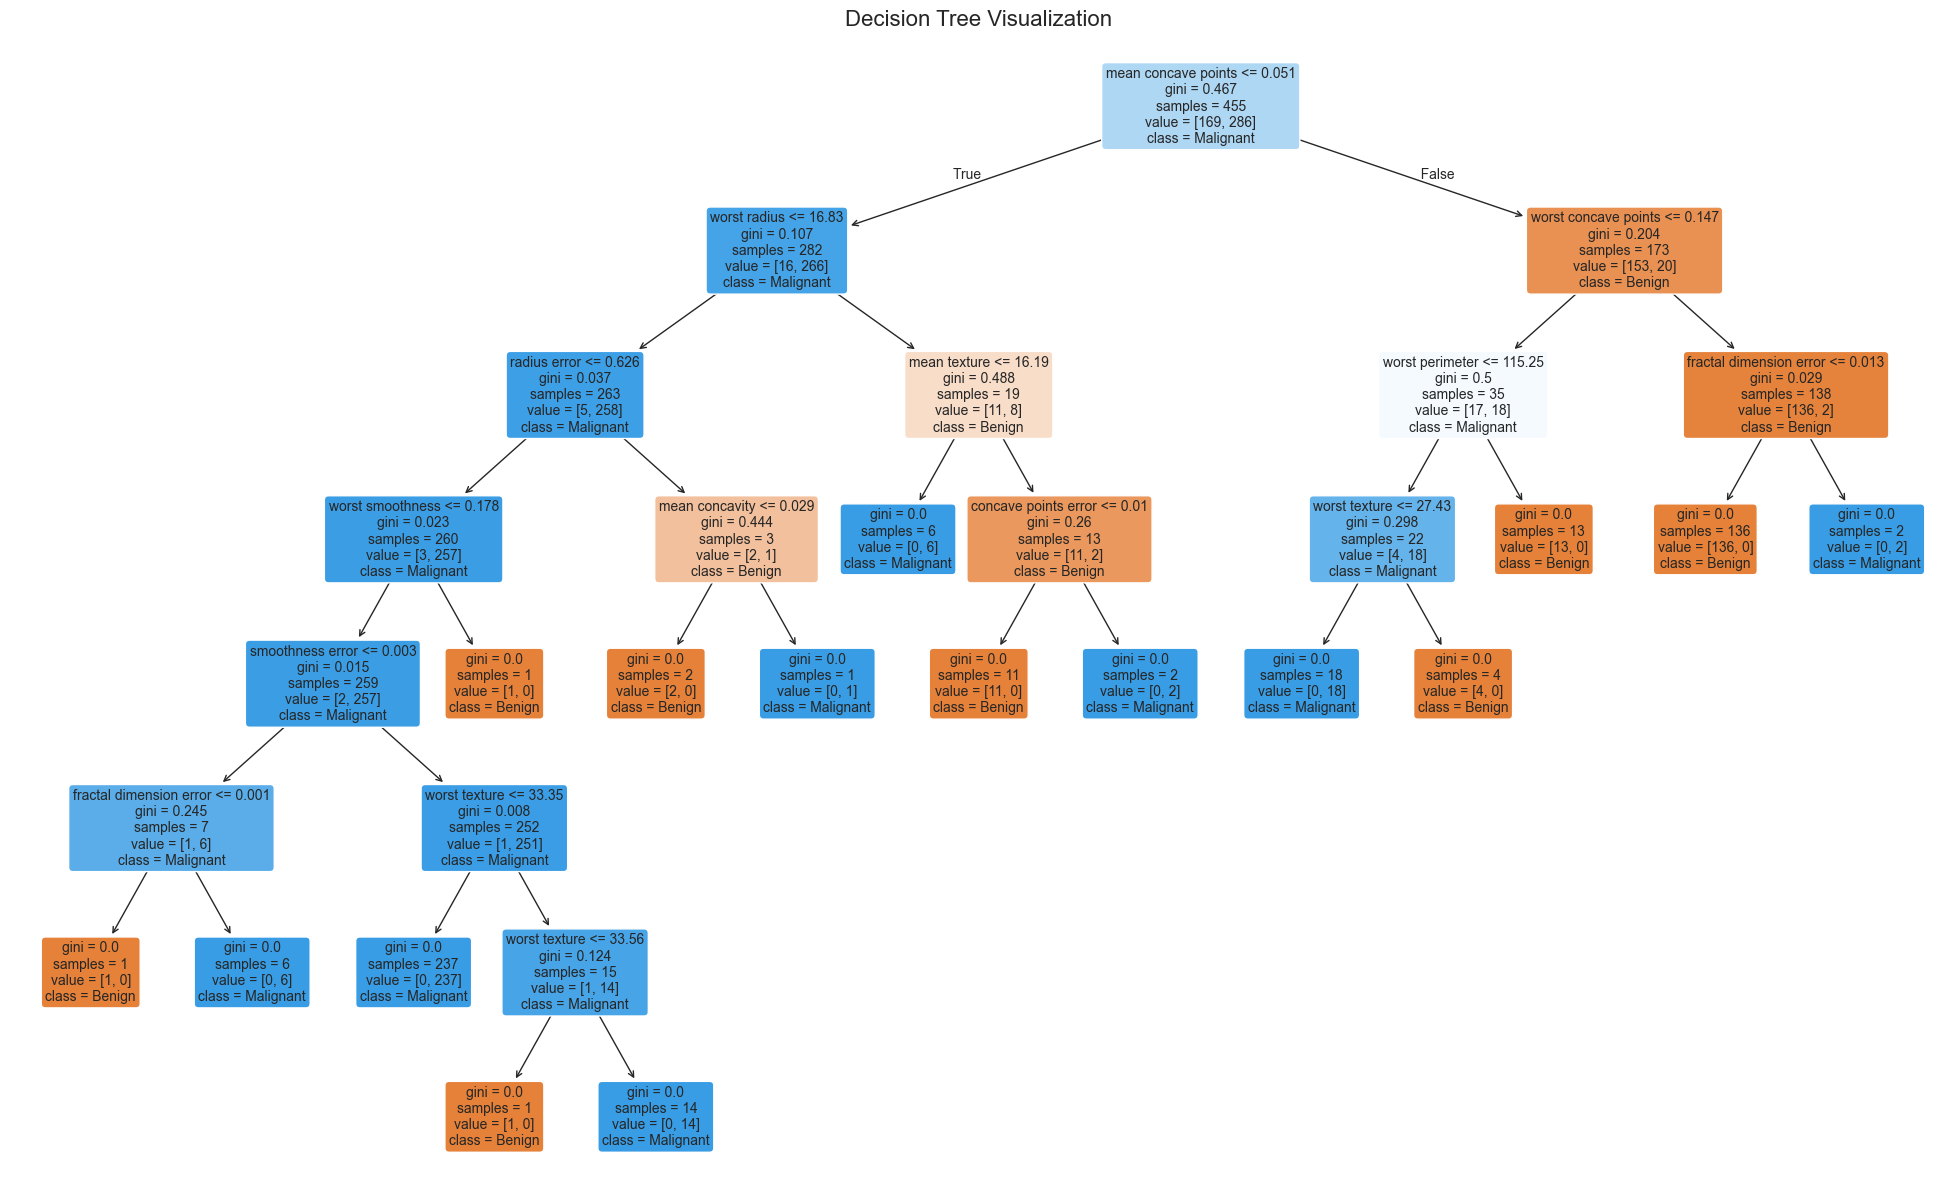

In [36]:
# INSERT CODE TO WRITE A FUNCTION "def plot_tree(model,X,Y)" VISUALIZE THE DECISION TREE (see https://mljar.com/blog/visualize-decision-tree/ for an example)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def plot_tree_model(model, X, class_names=None):
    """
    Visualizes the structure of a decision tree.

    Parameters:
    model: Trained decision tree model.
    X: Feature set (DataFrame or numpy array) used to train the model.
    class_names: List of class names for visualization. Default is None.
    """
    # Check if X is a DataFrame or numpy array
    if hasattr(X, 'columns'):
        feature_names = X.columns
    else:
        # If X is a numpy array, use default feature names
        feature_names = [f'Feature {i}' for i in range(X.shape[1])]

    # Plot the decision tree
    plt.figure(figsize=(25, 15))
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=class_names if class_names else ['Class 0', 'Class 1'],
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.title("Decision Tree Visualization", fontsize=16)
    plt.show()

# Example usage
# Assuming `model` is your trained decision tree model, `X_train` is your feature set
plot_tree_model(model, X_train, class_names=['Benign', 'Malignant'])


 #### 4.1.6  Hyper-parameter turning

The "max_depth" hyper-parameter lets us control the number of layers in our tree.

Lets iterate over "max_depth" and try to find the set of hyper-parameters with the lowest training AND test error.

In [37]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train, y_train)

    yp_train=model.predict(X_train)
    yp_test=model.predict(X_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([
        num_layer,
        accuracy_score(y_train, yp_train),             # Training accuracy
        recall_score(y_train, yp_train, pos_label=0),  # Training recall (Y=0)
        recall_score(y_train, yp_train, pos_label=1)   # Training recall (Y=1)
    ])


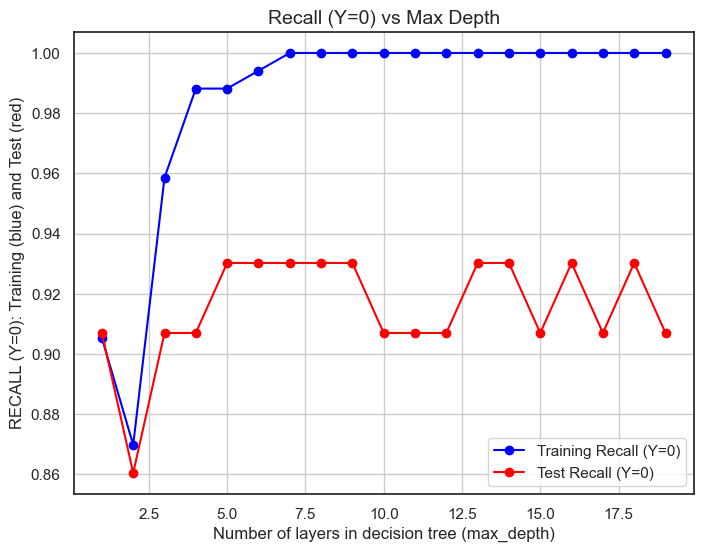

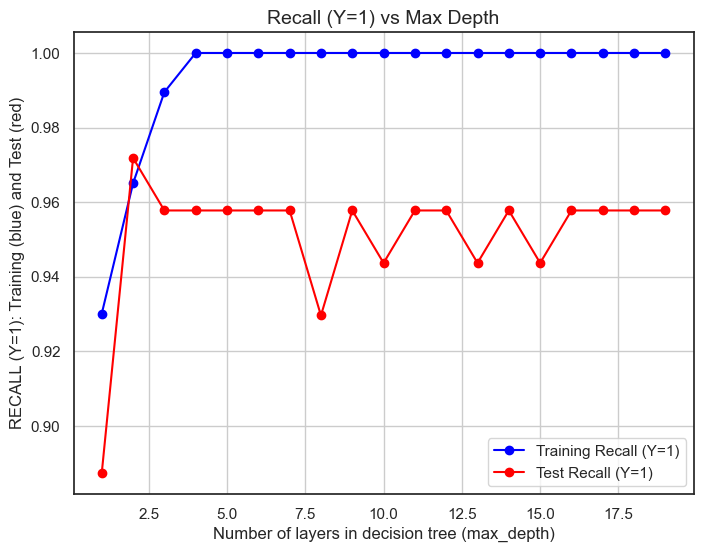

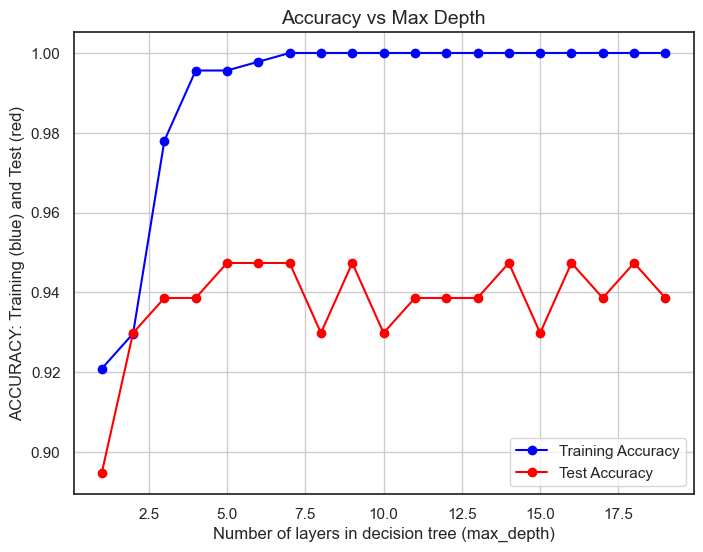

In [38]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)

# NOTE: THERE IS A TYPO IN THE THIRD PLOT, IT SHOULD BE RECALL IN THE Y-AXIS LABEL NOT ACCURACY

import matplotlib.pyplot as plt

# Extract data for plotting
depths = [result[0] for result in test_results]
train_accuracy_y0 = [result[2] for result in train_results]  # Training Recall (Y=0)
test_accuracy_y0 = [result[2] for result in test_results]    # Test Recall (Y=0)
train_accuracy_y1 = [result[3] for result in train_results]  # Training Recall (Y=1)
test_accuracy_y1 = [result[3] for result in test_results]    # Test Recall (Y=1)

# Plot Recall (Y=0) vs max_depth
plt.figure(figsize=(8, 6))
plt.plot(depths, train_accuracy_y0, label='Training Recall (Y=0)', color='blue', marker='o')
plt.plot(depths, test_accuracy_y0, label='Test Recall (Y=0)', color='red', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)', fontsize=12)
plt.ylabel('RECALL (Y=0): Training (blue) and Test (red)', fontsize=12)
plt.title('Recall (Y=0) vs Max Depth', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Plot Recall (Y=1) vs max_depth
plt.figure(figsize=(8, 6))
plt.plot(depths, train_accuracy_y1, label='Training Recall (Y=1)', color='blue', marker='o')
plt.plot(depths, test_accuracy_y1, label='Test Recall (Y=1)', color='red', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)', fontsize=12)
plt.ylabel('RECALL (Y=1): Training (blue) and Test (red)', fontsize=12)
plt.title('Recall (Y=1) vs Max Depth', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy (Y=1 and Y=0 combined) vs max_depth
train_overall_accuracy = [result[1] for result in train_results]
test_overall_accuracy = [result[1] for result in test_results]

plt.figure(figsize=(8, 6))
plt.plot(depths, train_overall_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(depths, test_overall_accuracy, label='Test Accuracy', color='red', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)', fontsize=12)
plt.ylabel('ACCURACY: Training (blue) and Test (red)', fontsize=12)
plt.title('Accuracy vs Max Depth', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

 #### 4.1.7 Train optimal model 
 
 Re-train the decision tree using the optimal hyper-parameter obtained from the plot above
 

In [40]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree

optimal_max_depth = 5

model = tree.DecisionTreeClassifier(max_depth=optimal_max_depth)
model = model.fit(X_train, y_train)

yp_train=model.predict(X_train)
yp_test=model.predict(X_test)

------TRAINING------
ACCURACY: 0.9956043956043956
NEGATIVE RECALL (Y=0): 0.9881656804733728
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 0.9930555555555556
Confusion Matrix:
[[167   2]
 [  0 286]]


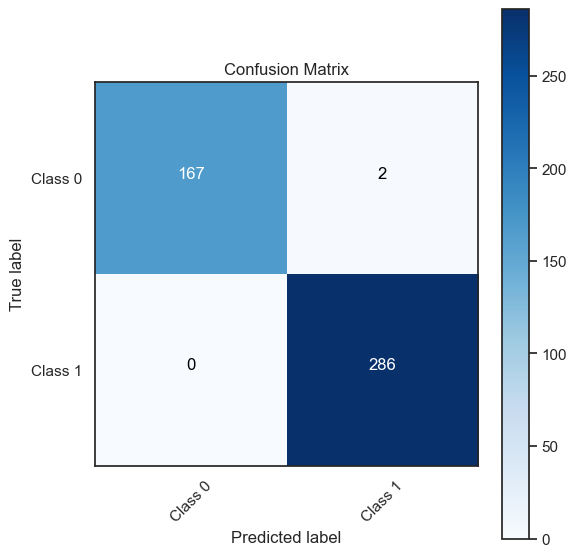

------TEST------
ACCURACY: 0.9298245614035088
NEGATIVE RECALL (Y=0): 0.9069767441860465
NEGATIVE PRECISION (Y=0): 0.9069767441860465
POSITIVE RECALL (Y=1): 0.9436619718309859
POSITIVE PRECISION (Y=1): 0.9436619718309859
Confusion Matrix:
[[39  4]
 [ 4 67]]


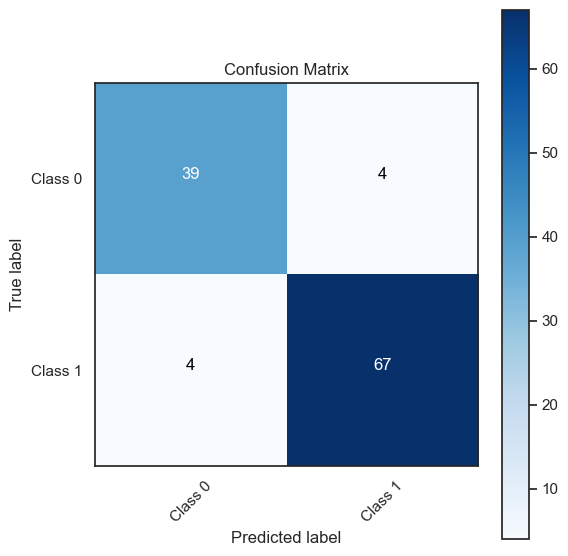

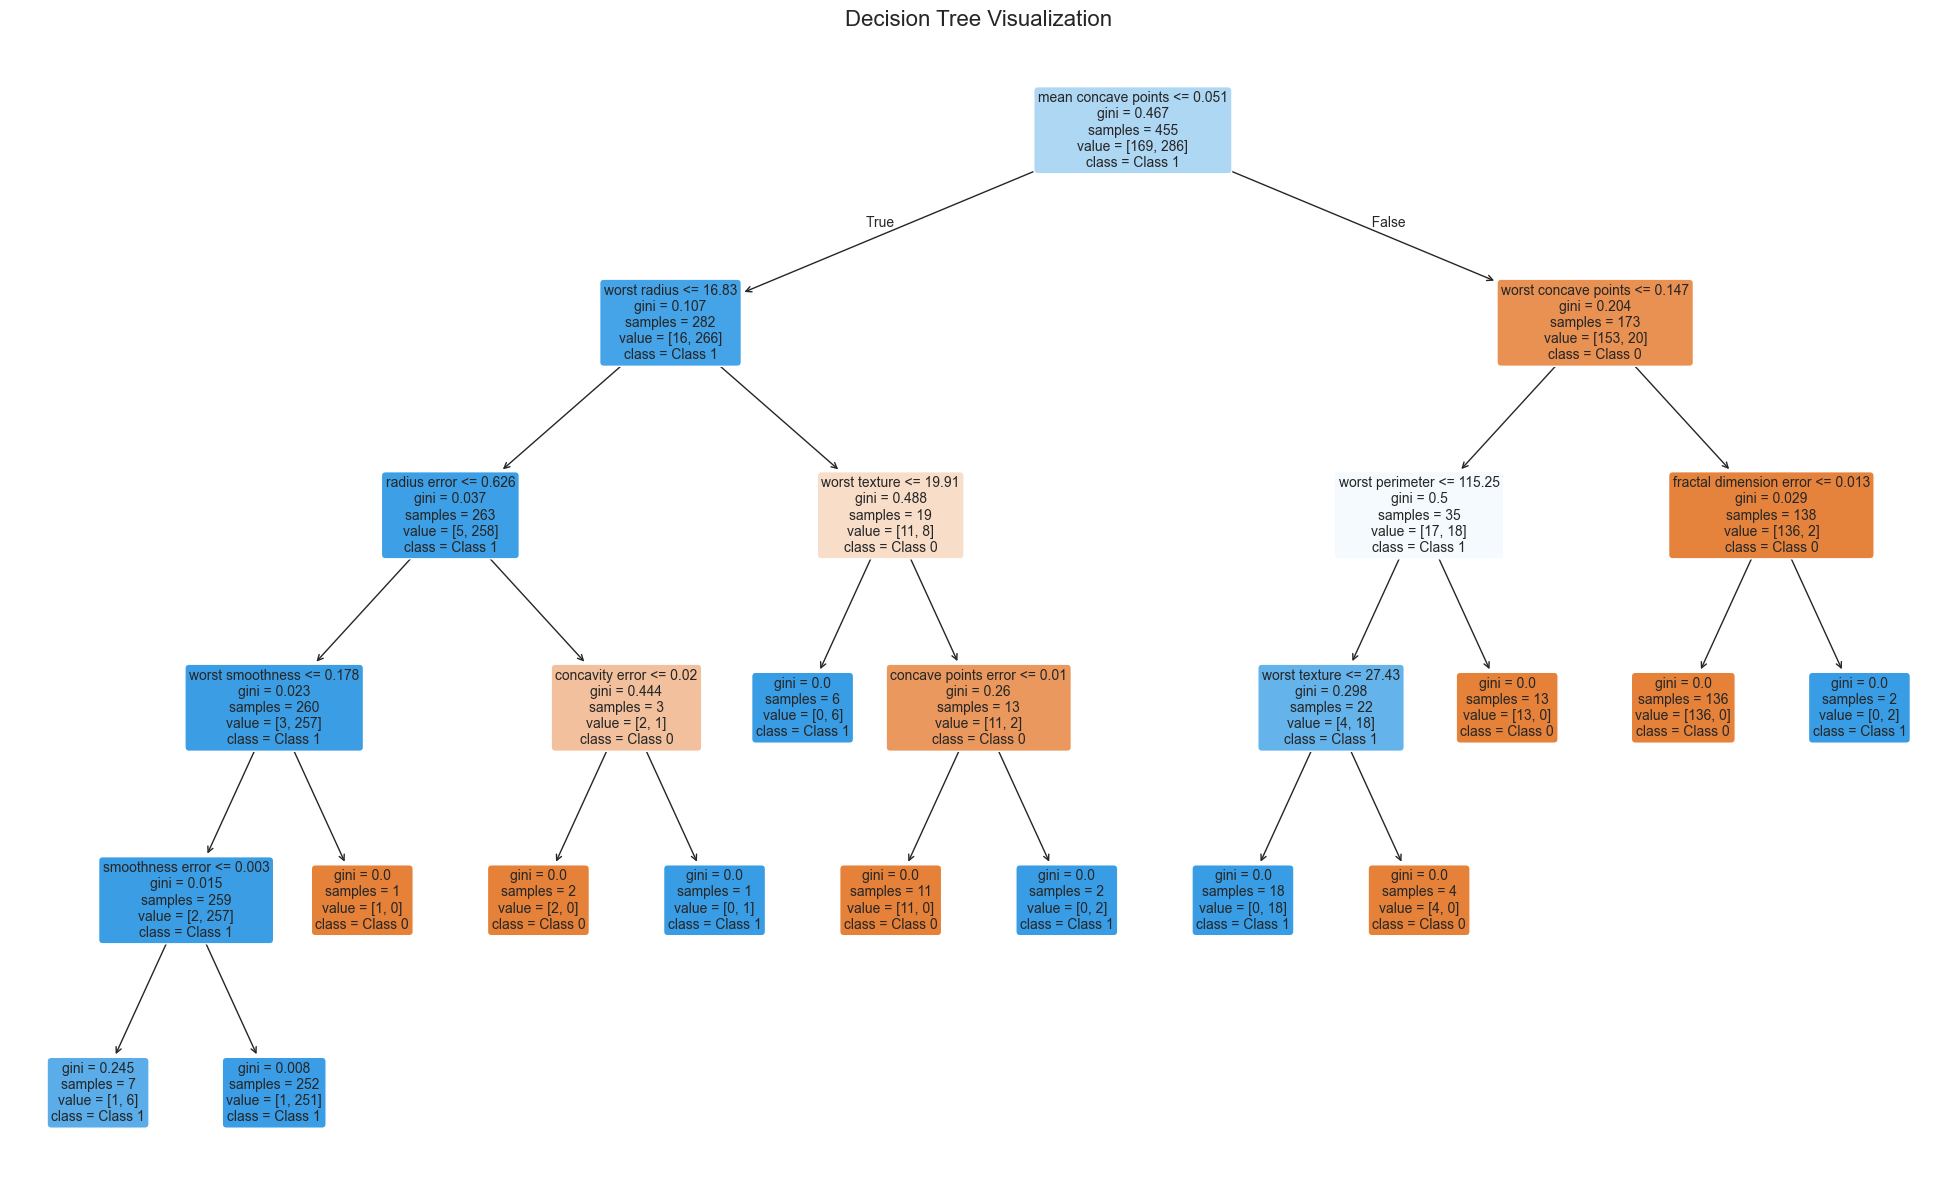

In [42]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

# Visualize the decision tree
plt.figure(figsize=(25, 15))
plot_tree(
    model, 
    feature_names=X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])], 
    class_names=['Class 0', 'Class 1'], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()
